# Exploracion GENERAL.

In [125]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# My Tools
%matplotlib inline

In [126]:
# Reseting figure size params.
plt.rcParams['figure.figsize'] = [12, 7]

In [127]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_theme(palette='pastel')

In [128]:
# Reading data.
df = pd.read_csv('encuesta_baches_fixed.csv')

In [129]:
# helper columns
def show_columns():
    for i in df.columns:print(i)

## Descripcion GENERAL de dataset.

In [130]:
df.shape

(439, 17)

    El dataset contiene 439 filas y 17 columnas de datos. Lo que puede traducirse en 439 respuestas a la encuesta.


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                439 non-null    int64 
 1   marca_temporal            439 non-null    object
 2   lugar_residencia          439 non-null    object
 3   lugar_residencia_py       247 non-null    object
 4   estado_calles             436 non-null    object
 5   problema_baches           437 non-null    object
 6   estimacion_cantidad       435 non-null    object
 7   tipo_camino               438 non-null    object
 8   tiempo_reparaciones       437 non-null    object
 9   como_denunciar            436 non-null    object
 10  acceso_informacion        438 non-null    object
 11  sufrio_accidentes         438 non-null    object
 12  frecuencia_mantenimiento  386 non-null    object
 13  denunciaria_baches        435 non-null    object
 14  util_conocer              

In [132]:
show_columns()

Unnamed: 0
marca_temporal
lugar_residencia
lugar_residencia_py
estado_calles
problema_baches
estimacion_cantidad
tipo_camino
tiempo_reparaciones
como_denunciar
acceso_informacion
sufrio_accidentes
frecuencia_mantenimiento
denunciaria_baches
util_conocer
respuesta_gubernamental
regularidad_reparaciones


## MOSTRAR CONTEO GENERALIZADO POR COLUMNAS

In [133]:
for i in df.columns:
    print('=='*20)
    print(f'COLUMNA -> {i}')
    print(df[i].value_counts())
    print('=='*20)
    print('\n'*3)

COLUMNA -> Unnamed: 0
0      1
289    1
300    1
299    1
298    1
      ..
143    1
142    1
141    1
140    1
438    1
Name: Unnamed: 0, Length: 439, dtype: int64




COLUMNA -> marca_temporal
29/10/2022 21:02:13    1
8/11/2022 22:41:21     1
8/11/2022 23:27:59     1
8/11/2022 23:25:49     1
8/11/2022 23:21:49     1
                      ..
3/11/2022 12:27:04     1
3/11/2022 12:00:17     1
3/11/2022 11:56:01     1
3/11/2022 11:52:08     1
9/11/2022 20:46:50     1
Name: marca_temporal, Length: 439, dtype: int64




COLUMNA -> lugar_residencia
Paraguay                       236
Mexico                          47
Argentina                       34
Spain                           21
Dominican Republic              19
Peru                            15
Venezuela                       13
Colombia                        12
Bolivia                         12
Chile                            5
Panama                           2
Honduras                         2
Uruguay                       

## lugar_residencia
    - A las personas que respondieron la encuesta se les pidio que indicaran su "lugar de residencia actual" y se les proveyo de una lista de paises con la posibilidad de seleccionar uno.

In [134]:
df['lugar_residencia'].isna().sum()

0

In [135]:
lr = df['lugar_residencia'].value_counts()

In [136]:
# Grafica por conteo del lugar de residencia de los que respondieron la encuesta.
# SOLO LOS LUGARES CON MAS DE 1 RESPUESTA A LA ENCUESTA.
mas_una_respuesta = lr[lr>1]

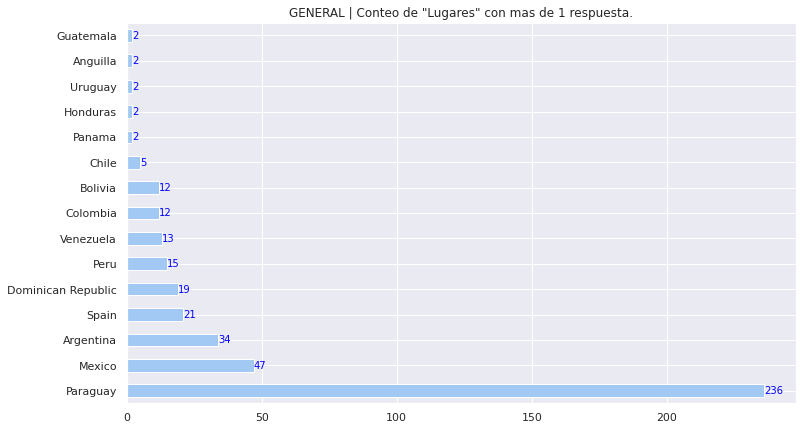

In [186]:
fig1 = mas_una_respuesta.plot(
    kind='barh',
    title=f'GENERAL | Conteo de "Lugares" con mas de 1 respuesta.',
)

for k,v in enumerate(mas_una_respuesta):
    fig1.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

    - Puede verse que los paises con menos respuestas son: Guatemala, Anguilla, Uruguay, Honduras, Panama.

## lugar_residencia_py
    - A los que respondieron la encuesta se les pidio, en el caso posible de seleccionar Paraguay como "lugar de residencia actual", que indicaran el departamento donde residen actualmente. Con el fin de fasilitar la tarea, se les proveyo a los encuestados una lista de departamentos para que puedan seleccionar una opcion.

In [138]:
df['lugar_residencia_py'].isna().sum()

192

In [139]:
lrpy = df['lugar_residencia_py'].value_counts()

In [140]:
lrpy

Central             165
Distrito Capital     33
Alto Paraná          17
Caaguazú              8
Itapúa                7
Cordillera            4
Ñeembucú              3
Amambay               3
Paraguarí             2
Canindeyú             1
Misiones              1
Alto Paraguay         1
Concepción            1
Presidente Hayes      1
Name: lugar_residencia_py, dtype: int64

    Tomamos en cuenta solo los lugares con cantidad de respuestas mayor a 1.

In [141]:
lrpy_mayor_uno = lrpy[lrpy>1]

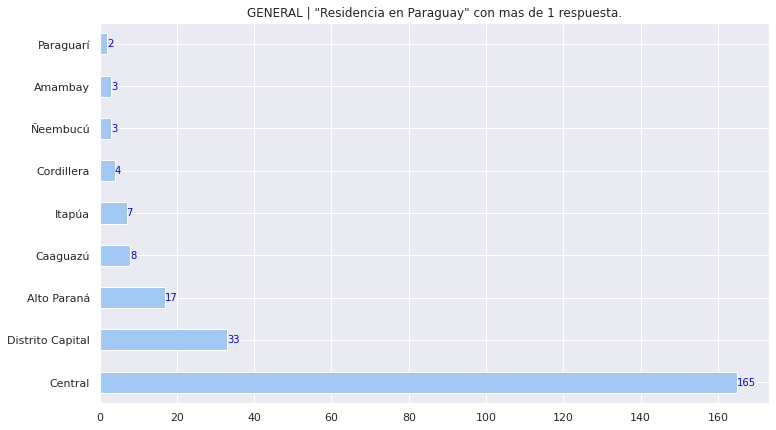

In [184]:
fig2 = lrpy_mayor_uno.plot(
    kind='barh',
    title=f'GENERAL | "Residencia en Paraguay" con mas de 1 respuesta.',
)

for k,v in enumerate(lrpy_mayor_uno):
    fig2.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

## estado_calles
    - A los encuestados se les pregunto sobre "el estado actual de las calles" en su lugar de residencia actual.

In [143]:
# ver cantidad de respuestas validas.
df['estado_calles'].isna().sum()

3

In [144]:
est_calles = df['estado_calles'].value_counts()

In [145]:
est_calles

Malo          187
Lamentable    155
Bueno          82
EXCELENTE      12
Name: estado_calles, dtype: int64

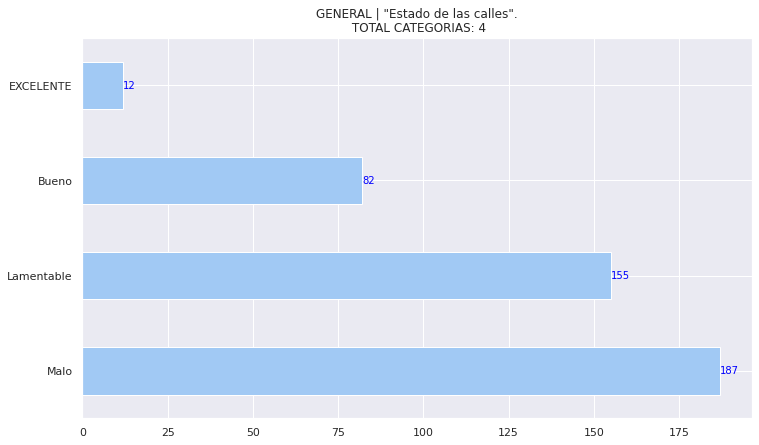

In [146]:
fig3 = est_calles.plot(
    kind='barh',
    title=f'GENERAL | "Estado de las calles".\n TOTAL CATEGORIAS: {est_calles.size}',
)

for k,v in enumerate(est_calles):
    fig3.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

In [147]:
porcent_estado_calles = df['estado_calles'].value_counts(normalize=True)

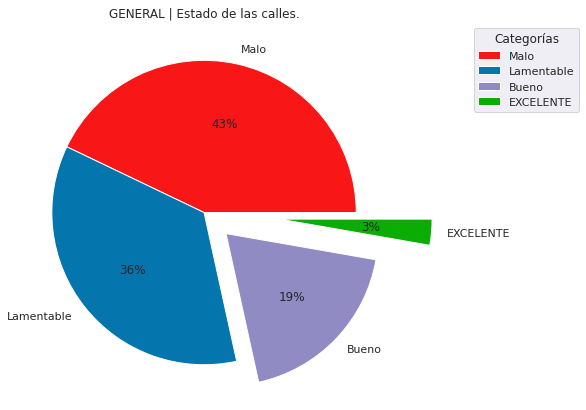

In [148]:
fig4 = df['estado_calles'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Estado de las calles.',
    explode = [0,0,.2,.5],
    colors=['#f81616','#0575ad',"#918BC3",'#0bad05'],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    
    ylabel=''
)

sns.move_legend(
    fig4,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()


## problema_baches
    - A los encuestados se les pregunto si consideran que su "lugar de residencia actual" posee un problema de baches.

In [149]:
prob_baches = df['problema_baches'].value_counts()

In [150]:
prob_baches

SI       375
NO        51
NO SE     11
Name: problema_baches, dtype: int64

In [151]:
df['problema_baches'].isna().sum()

2

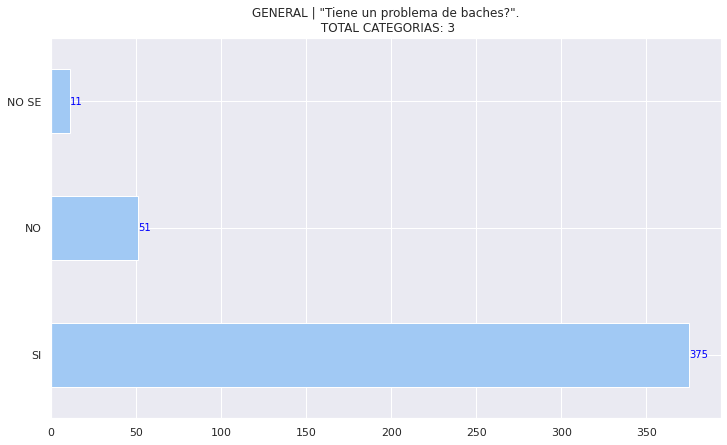

In [202]:
fig5 = prob_baches.plot(
    kind='barh',
    title=f'GENERAL | "Tiene un problema de baches?".\n TOTAL CATEGORIAS: {prob_baches.size}',
    
)

for k,v in enumerate(prob_baches):
    fig5.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

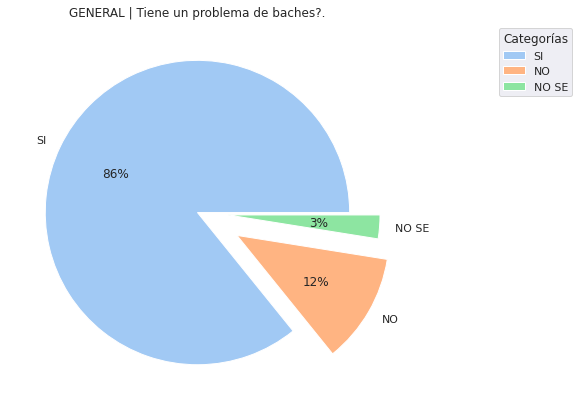

In [203]:
fig6 = df['problema_baches'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Tiene un problema de baches?.',
    explode = [0,.3,.2],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    
    ylabel=''
)

sns.move_legend(
    fig6,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()

## estimacion_cantidad
    - A los encuestados se les pregunto tambien si podrian hacer una estimacion aproximada de la cantidad de baches que existen en su lugar de residencia actual.

In [204]:
est_cant = df['estimacion_cantidad'].value_counts()

In [205]:
est_cant

MUCHOS    325
POCOS      85
NO SE      25
Name: estimacion_cantidad, dtype: int64

In [206]:
df['estimacion_cantidad'].isna().sum()

4

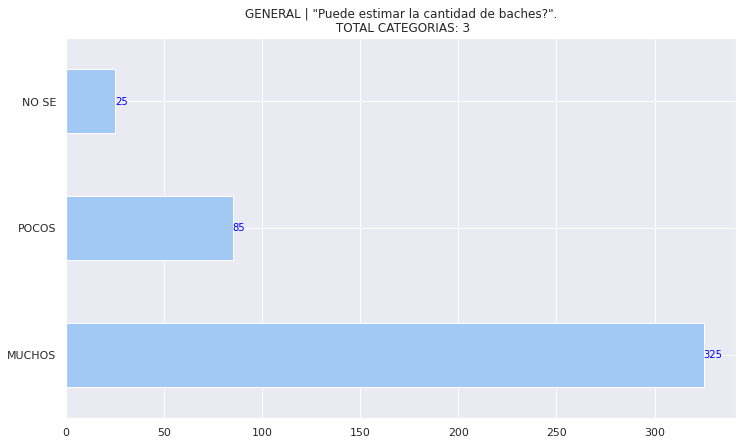

In [207]:
fig7 = est_cant.plot(
    kind='barh',
    title=f'GENERAL | "Puede estimar la cantidad de baches?".\n TOTAL CATEGORIAS: {est_cant.size}',
)

for k,v in enumerate(est_cant):
    fig7.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

## tipo_camino

In [208]:
df['tipo_camino'].isna().sum()

1

In [209]:
tipo_camino=df['tipo_camino'].value_counts()

In [210]:
tipo_camino

ASFALTO    291
MIXTO       77
PIEDRA      57
TIERRA      13
Name: tipo_camino, dtype: int64

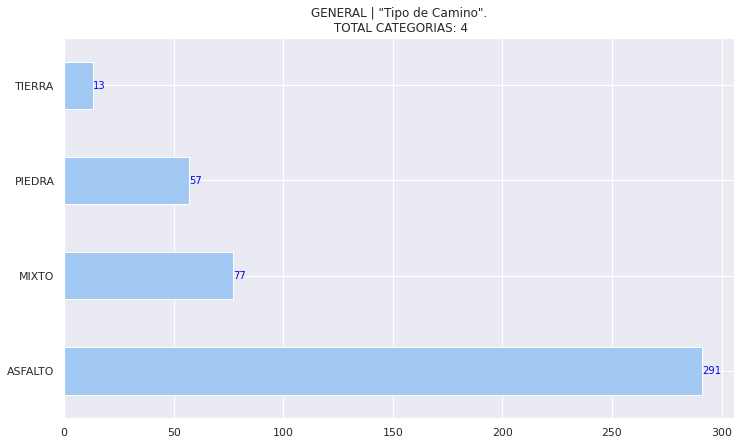

In [211]:
fig8 = tipo_camino.plot(
    kind='barh',
    title=f'GENERAL | "Tipo de Camino".\n TOTAL CATEGORIAS: {tipo_camino.size}',
)

for k,v in enumerate(tipo_camino):
    fig8.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

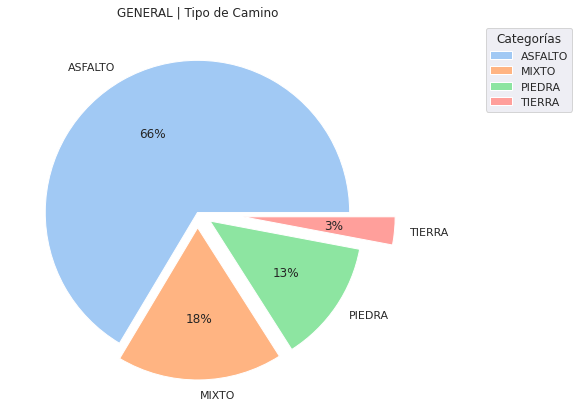

In [212]:
fig9 = df['tipo_camino'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Tipo de Camino',
    explode = [0,.1,.1,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    fig9,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()

## tiempo_reparaciones
    - A los encuestados se les pidio que indiquen el "tiempo" que demoran las "reparaciones viales".

In [213]:
df['tiempo_reparaciones'].isna().sum()

2

In [214]:
tiempo_rep = df['tiempo_reparaciones'].value_counts()

In [215]:
tiempo_rep

NO SE REPARAN    204
MUCHO            181
POCO              52
Name: tiempo_reparaciones, dtype: int64

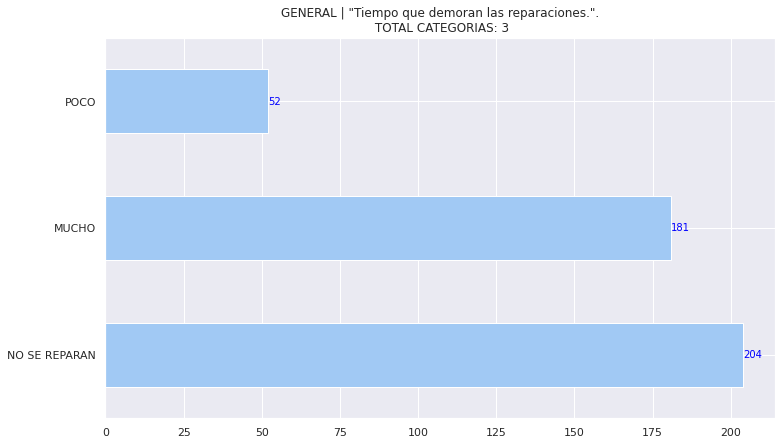

In [216]:
fig10 = tiempo_rep.plot(
    kind='barh',
    title=f'GENERAL | "Tiempo que demoran las reparaciones.".\n TOTAL CATEGORIAS: {tiempo_rep.size}',
)

for k,v in enumerate(tiempo_rep):
    fig10.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

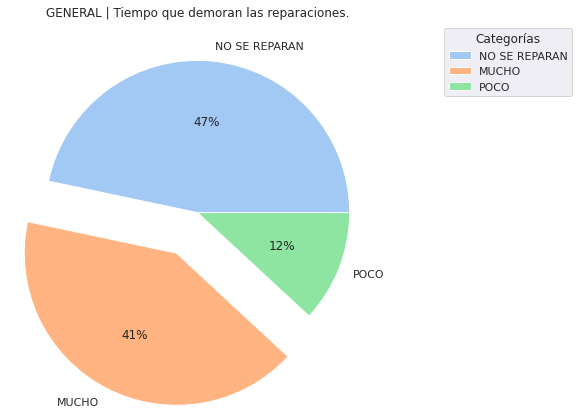

In [217]:
fig11 = df['tiempo_reparaciones'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Tiempo que demoran las reparaciones.',
    explode = [0,.3,0],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    fig11,
    "upper right", 
    bbox_to_anchor=(1.5, 1), title='Categorías')


plt.show()

## como_denunciar
    - Se les pregunto a los encuestados si conocian algun metodo que les permita "denunciar" la existencia de baches en su lugar de residencia actual.

In [218]:
df['como_denunciar'].isna().sum()

3

In [219]:
como_de = df['como_denunciar'].value_counts()

In [220]:
como_de

NO    321
SI    115
Name: como_denunciar, dtype: int64

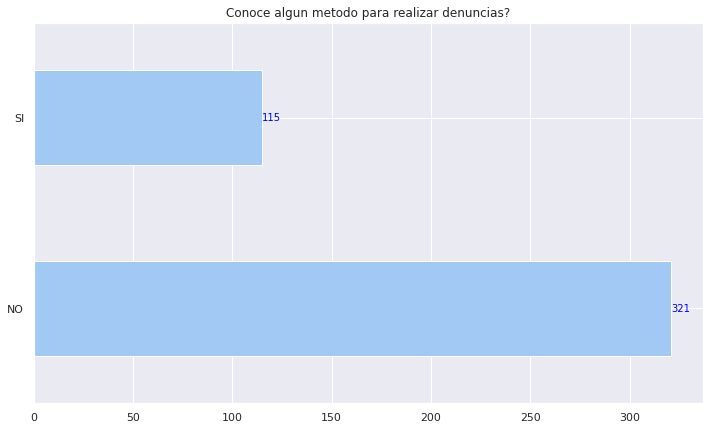

In [221]:
como_denunciar_plot = como_de.plot(
    title=f'Conoce algun metodo para realizar denuncias?',
    kind='barh')

for k,v in enumerate(como_de):
    como_denunciar_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

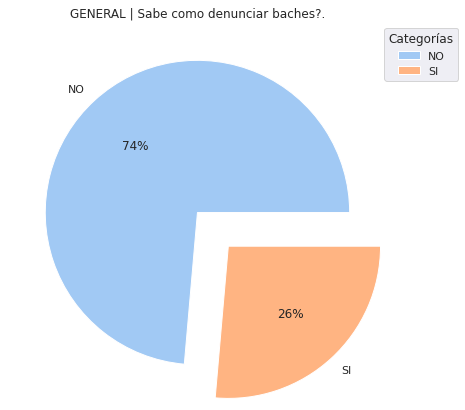

In [222]:
fig12 = df['como_denunciar'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Sabe como denunciar baches?.',
    explode = [0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    fig12,
    "upper right", 
    bbox_to_anchor=(1.2, 1), title='Categorías')


plt.show()

## acceso_informacion
    - A los encuestados se les pregunto si conocian o podian acceder a informacion relevante a baches, tal como la ubicacion, tereas de reparacion, etc.

In [223]:
acc_info = df['acceso_informacion'].value_counts()

In [224]:
acc_info

NO       230
NO SE    159
SI        49
Name: acceso_informacion, dtype: int64

In [225]:
df['acceso_informacion'].isna().sum()

1

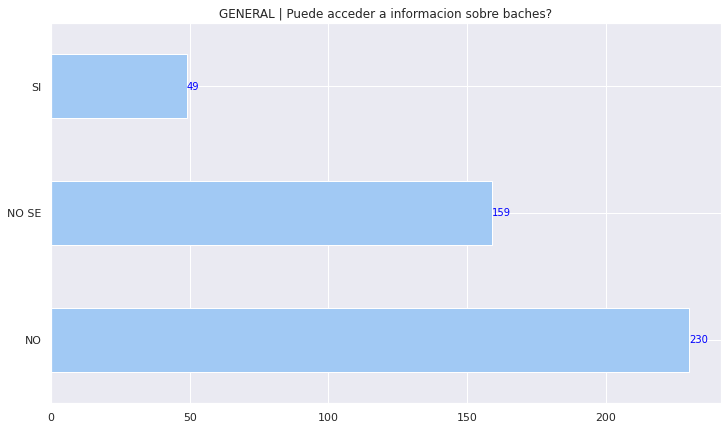

In [226]:
acc_info_plot = acc_info.plot(
    kind='barh',
    title='GENERAL | Puede acceder a informacion sobre baches?',
)
for k,v in enumerate(acc_info):
    acc_info_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

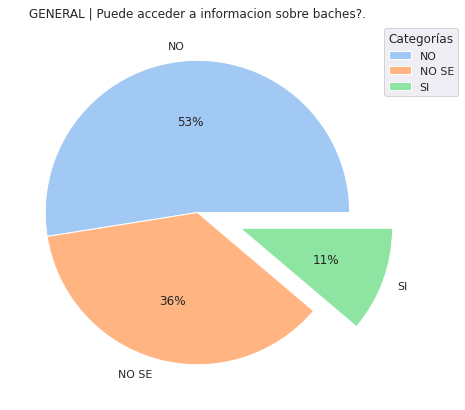

In [227]:
acc_info_pie = df['acceso_informacion'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Puede acceder a informacion sobre baches?.',
    explode = [0,0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    acc_info_pie,
    "upper right", 
    bbox_to_anchor=(1.2, 1), title='Categorías')


plt.show()

## sufrio_accidentes
    - Se les pregunto a los encuestados si alguna vez sufrieron accidentes a causa de "baches" o el estado de las calles en su lugar de residencia actual.

In [229]:
suf_acc = df['sufrio_accidentes'].value_counts()

In [230]:
suf_acc

NO                   208
SI                   150
NO NUNCA              57
SI FRECUENTEMENTE     23
Name: sufrio_accidentes, dtype: int64

In [231]:
df['sufrio_accidentes'].isna().sum()

1

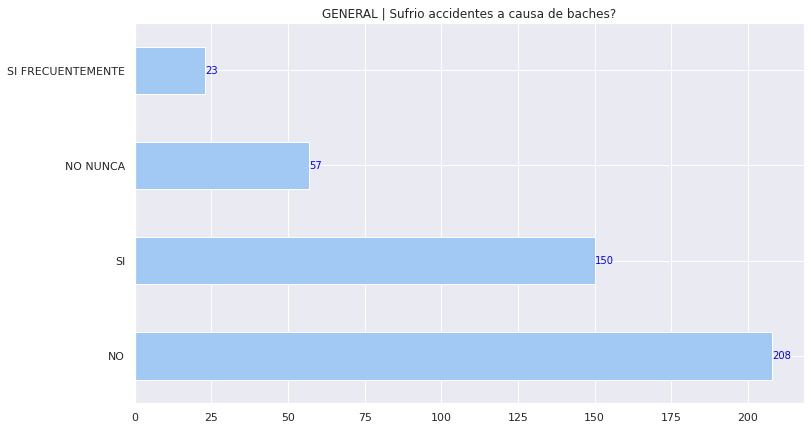

In [233]:
suf_acc_plot = suf_acc.plot(
    kind='barh',
    title='GENERAL | Sufrio accidentes a causa de baches?',
)
for k,v in enumerate(suf_acc):
    suf_acc_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

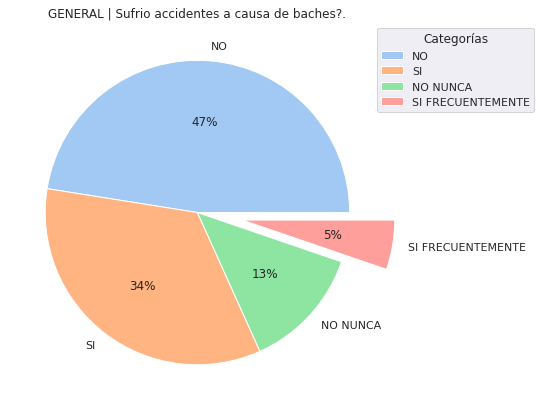

In [237]:
suf_acc_pie = df['sufrio_accidentes'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Sufrio accidentes a causa de baches?.',
    explode = [0,0,0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    suf_acc_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

## frecuencia_mantenimiento
    - Se les pregunto a los encuestados sobre la frecuencia en que hacen "mantenimiento" a sus vehiculos en caso de tenerlos.

In [238]:
frec_mant = df['frecuencia_mantenimiento'].value_counts()

In [239]:
df['frecuencia_mantenimiento'].isna().sum()

53

In [240]:
frec_mant

REGULARMENTE      228
FRECUENTEMENTE    158
Name: frecuencia_mantenimiento, dtype: int64

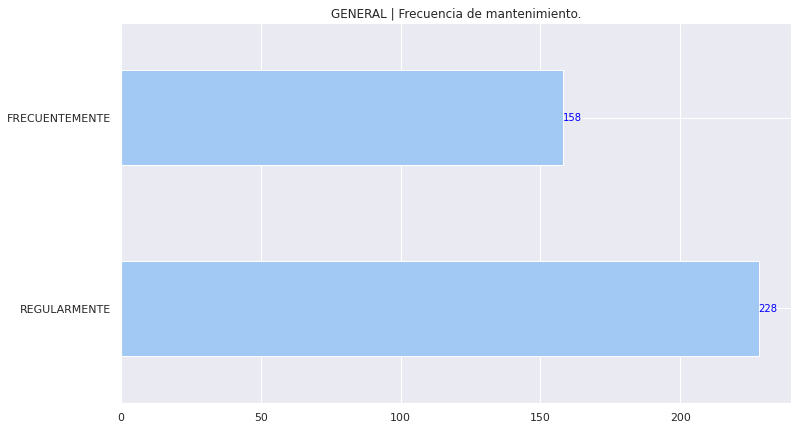

In [241]:
frec_mant_plot = frec_mant.plot(
    kind='barh',
    title='GENERAL | Frecuencia de mantenimiento.',
)
for k,v in enumerate(frec_mant):
    frec_mant_plot.annotate(v,(v,k),  va='center',color='blue',fontsize=10)
plt.show()

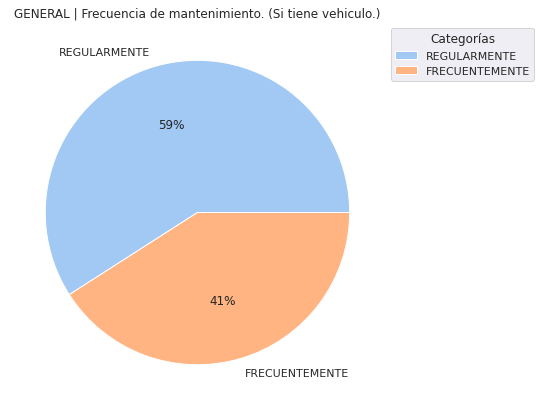

In [242]:
frec_mant_pie = df['frecuencia_mantenimiento'].value_counts(normalize=True).plot(
    kind='pie',
    title='GENERAL | Frecuencia de mantenimiento. (Si tiene vehiculo.)',
    #explode = [0,0,0,.3],
    legend=True,
    autopct='%.0f%%',
    xlabel='',
    ylabel=''
)

sns.move_legend(
    frec_mant_pie,
    "upper right", 
    bbox_to_anchor=(1.4, 1), title='Categorías')


plt.show()

In [180]:
## denunciaria_baches

In [181]:
## util_conocer

In [182]:
## respuesta_gubernamental

In [183]:
## regularidad_reparaciones